In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']
numerical_features = [col for col in df.columns if df[col].dtype != 'O']
categorical_features, numerical_features

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [10]:
for col in categorical_features:
    print(df[col].value_counts(normalize= True) * 100)


case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

### Univarient analysis
- Numerical features

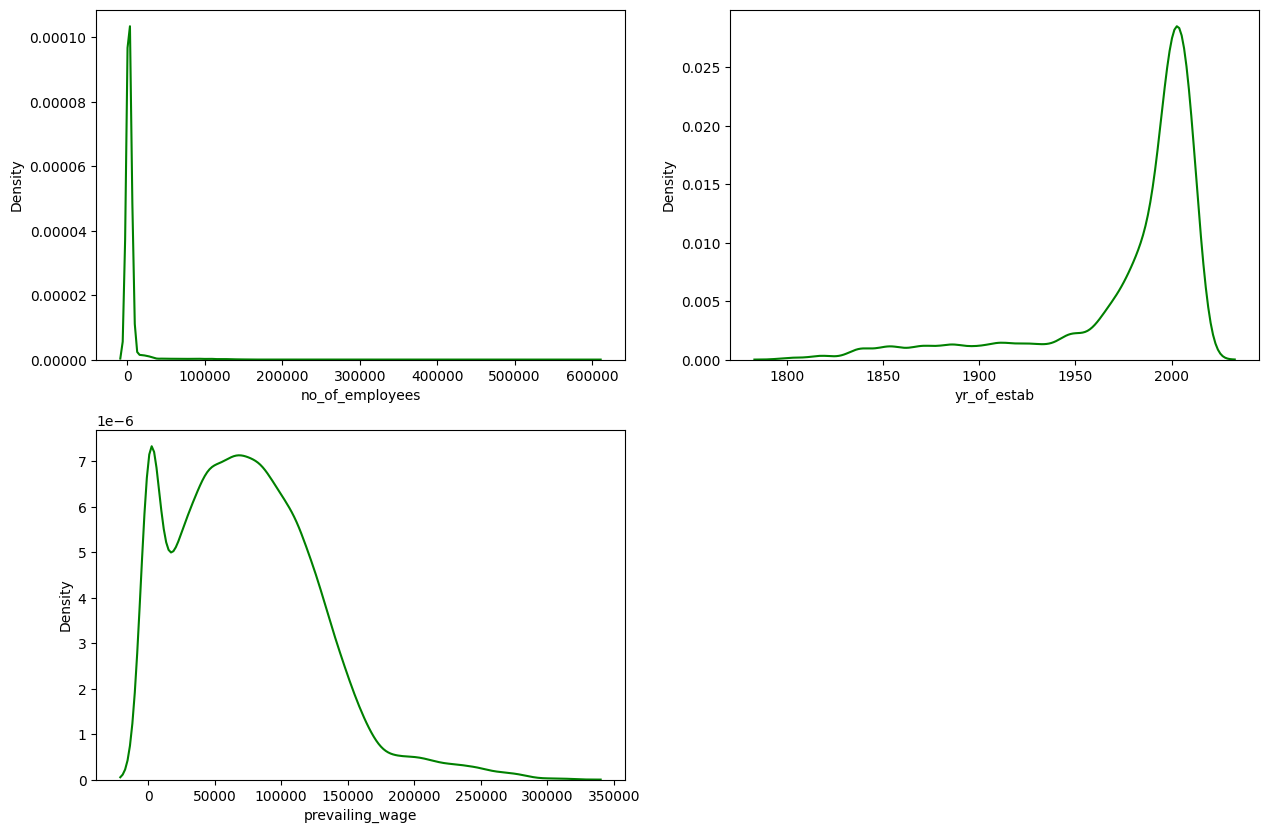

In [16]:
plt.figure(figsize= (15, 10))
for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x= df[numerical_features[i]], color= 'green')
    plt.xlabel(numerical_features[i])
    # plt.tight_layout()
    
plt.show()

## - categorical analysis

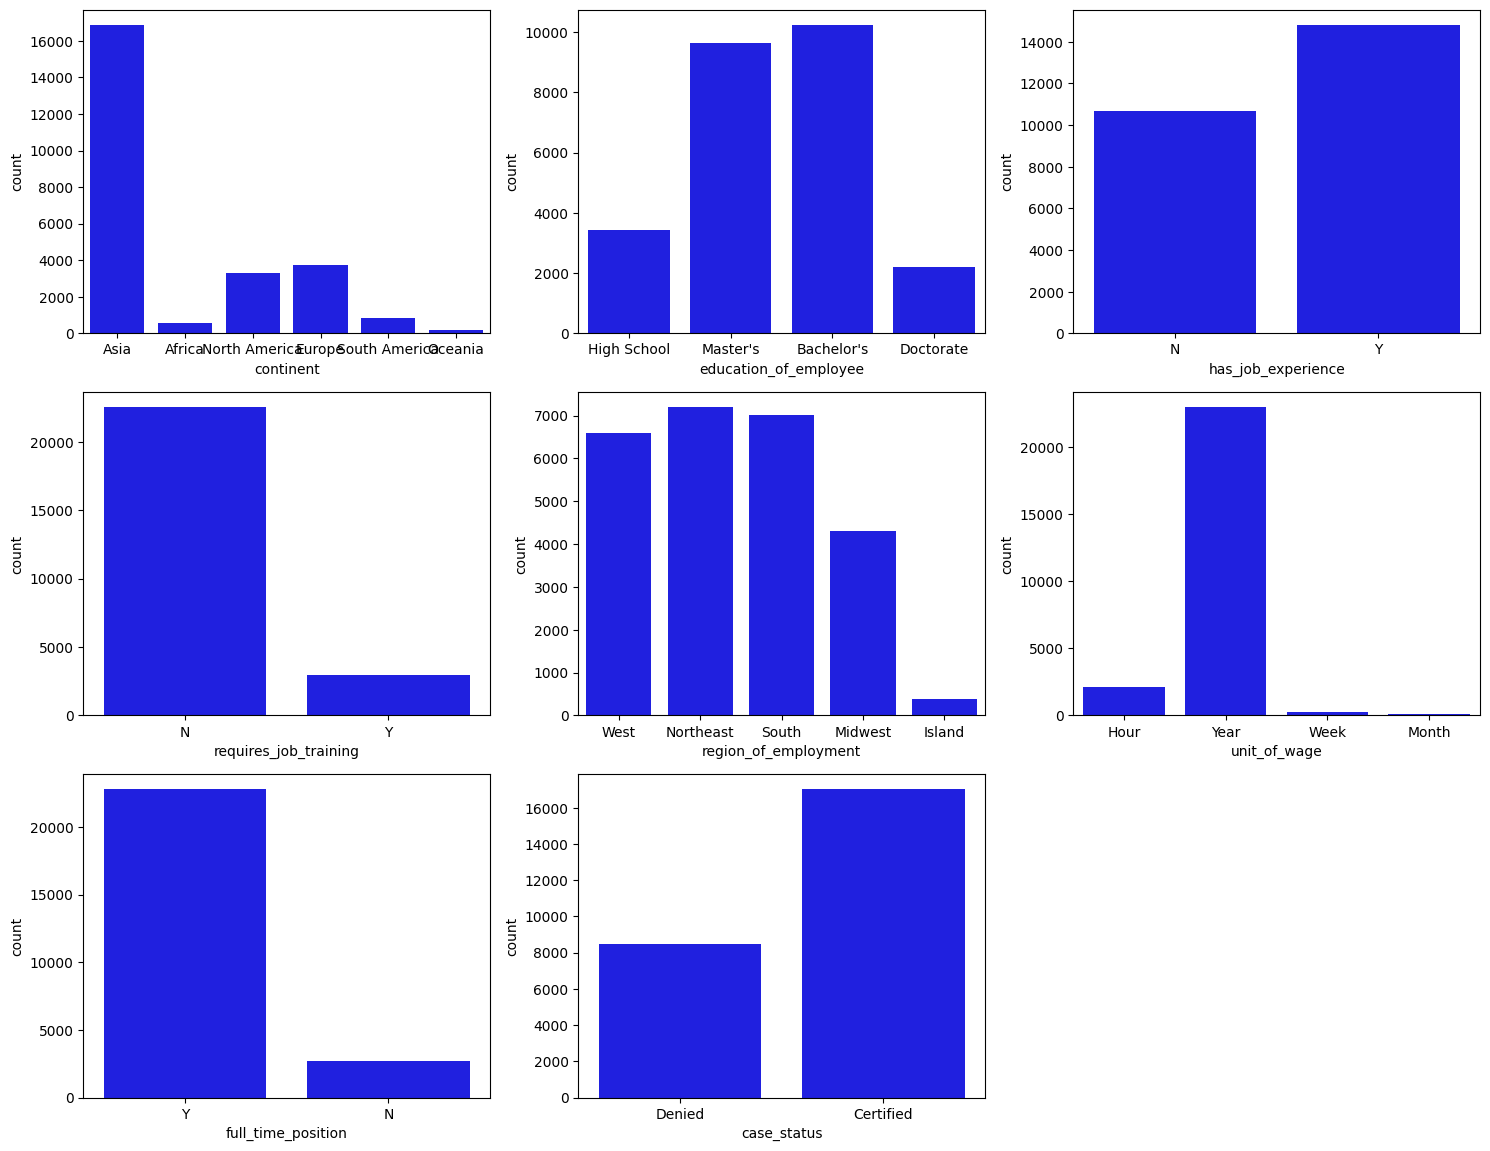

In [24]:
plt.figure(figsize= (15, 15))
# categorical_features.remove('case_id')
for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x= df[categorical_features[i]], color= 'blue')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
plt.show()

### Multiarient Analysis
- Numerical data


In [27]:
discreate_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
continuos_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]
len(discreate_features), len(continuos_features)

(0, 3)

In [28]:
df[continuos_features].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


Ther has no corralation between numerical feratures


#### Categorical features

In [34]:
from scipy.stats import chi2_contingency
chi2_table = []

for col in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[col]))[1] < 0.05:
        chi2_table.append("Reject NUll hypothesis")
    else:
        chi2_table.append("Fail to reject null hypothesis")
corr = pd.DataFrame(data=(categorical_features, chi2_table)).T 
corr.columns = ['column', 'Hypothesis Result']
corr

,column,Hypothesis Result
0,continent,Reject NUll hypothesis
1,education_of_employee,Reject NUll hypothesis
2,has_job_experience,Reject NUll hypothesis
3,requires_job_training,Fail to reject null hypothesis
4,region_of_employment,Reject NUll hypothesis
5,unit_of_wage,Reject NUll hypothesis
6,full_time_position,Reject NUll hypothesis
7,case_status,Reject NUll hypothesis


#### require_job_training has no correlation with case_status. thus it can be dropped

In [37]:
df.groupby('continent')['case_status'].value_counts(normalize= True).to_frame() * 100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [40]:
print(df.groupby('education_of_employee')['case_status'].value_counts(normalize= True).to_frame() * 100)
print(df.groupby('has_job_experience')['case_status'].value_counts(normalize= True).to_frame() * 100)
print(df.groupby('region_of_employment')['case_status'].value_counts(normalize= True).to_frame() * 100)
print(df.groupby('unit_of_wage')['case_status'].value_counts(normalize= True).to_frame() * 100)
print(df.groupby('full_time_position')['case_status'].value_counts(normalize= True).to_frame() * 100)

                                   proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223
                                proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578
                                  proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast   

### Checking for outliers
- Numerical columns

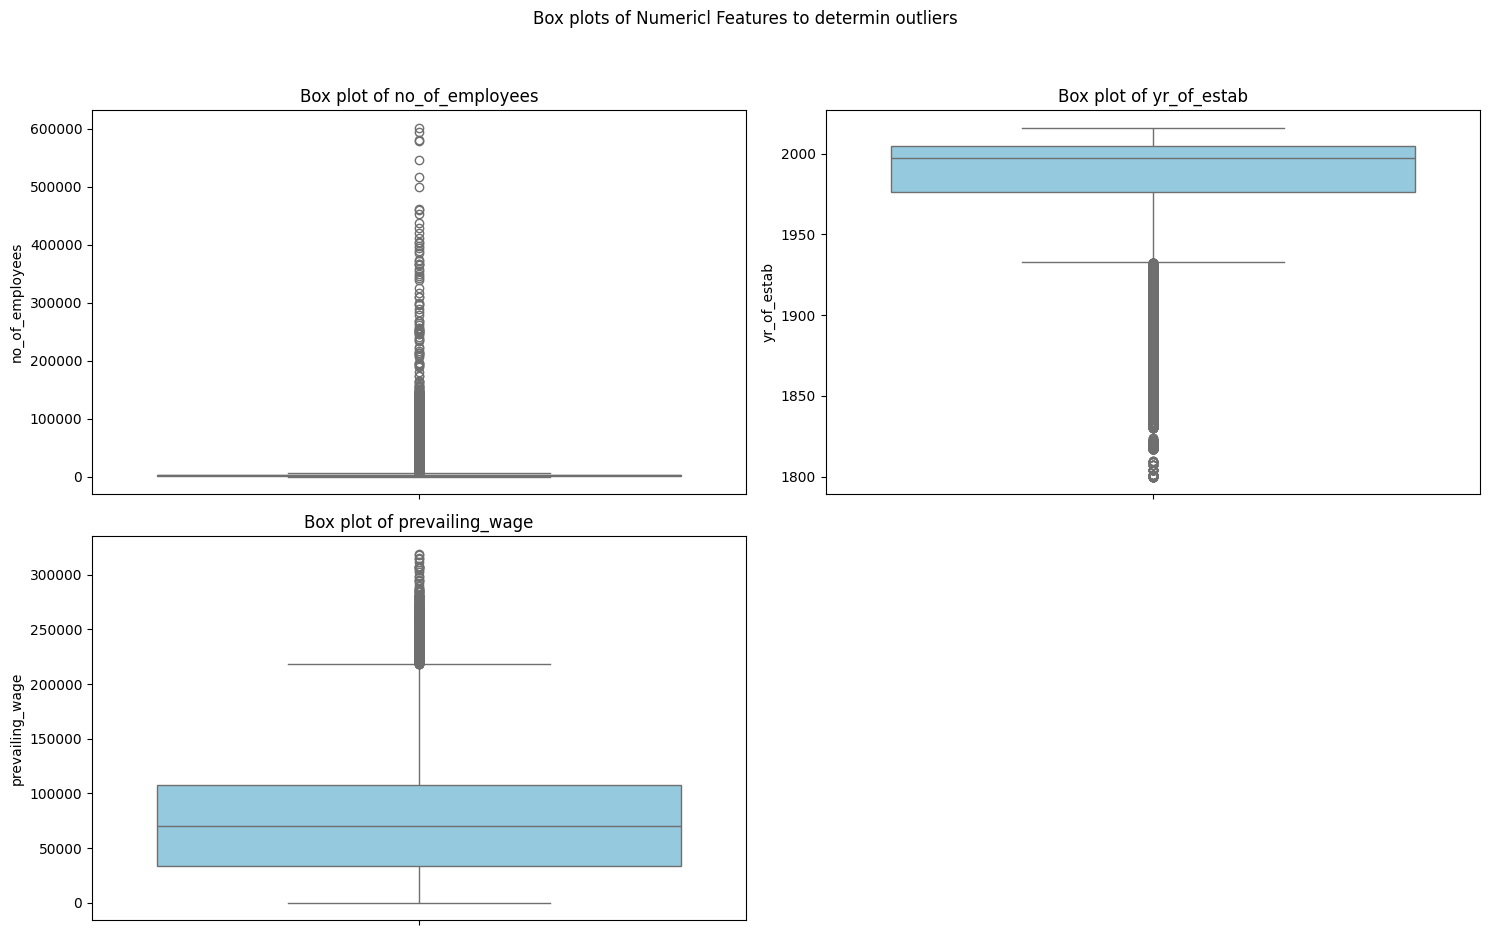

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Box plots of Numericl Features to determin outliers")

for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)

    sns.boxplot(y= df[col], color= 'skyblue')
    plt.title(f"Box plot of {col}")
    plt.ylabel('')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

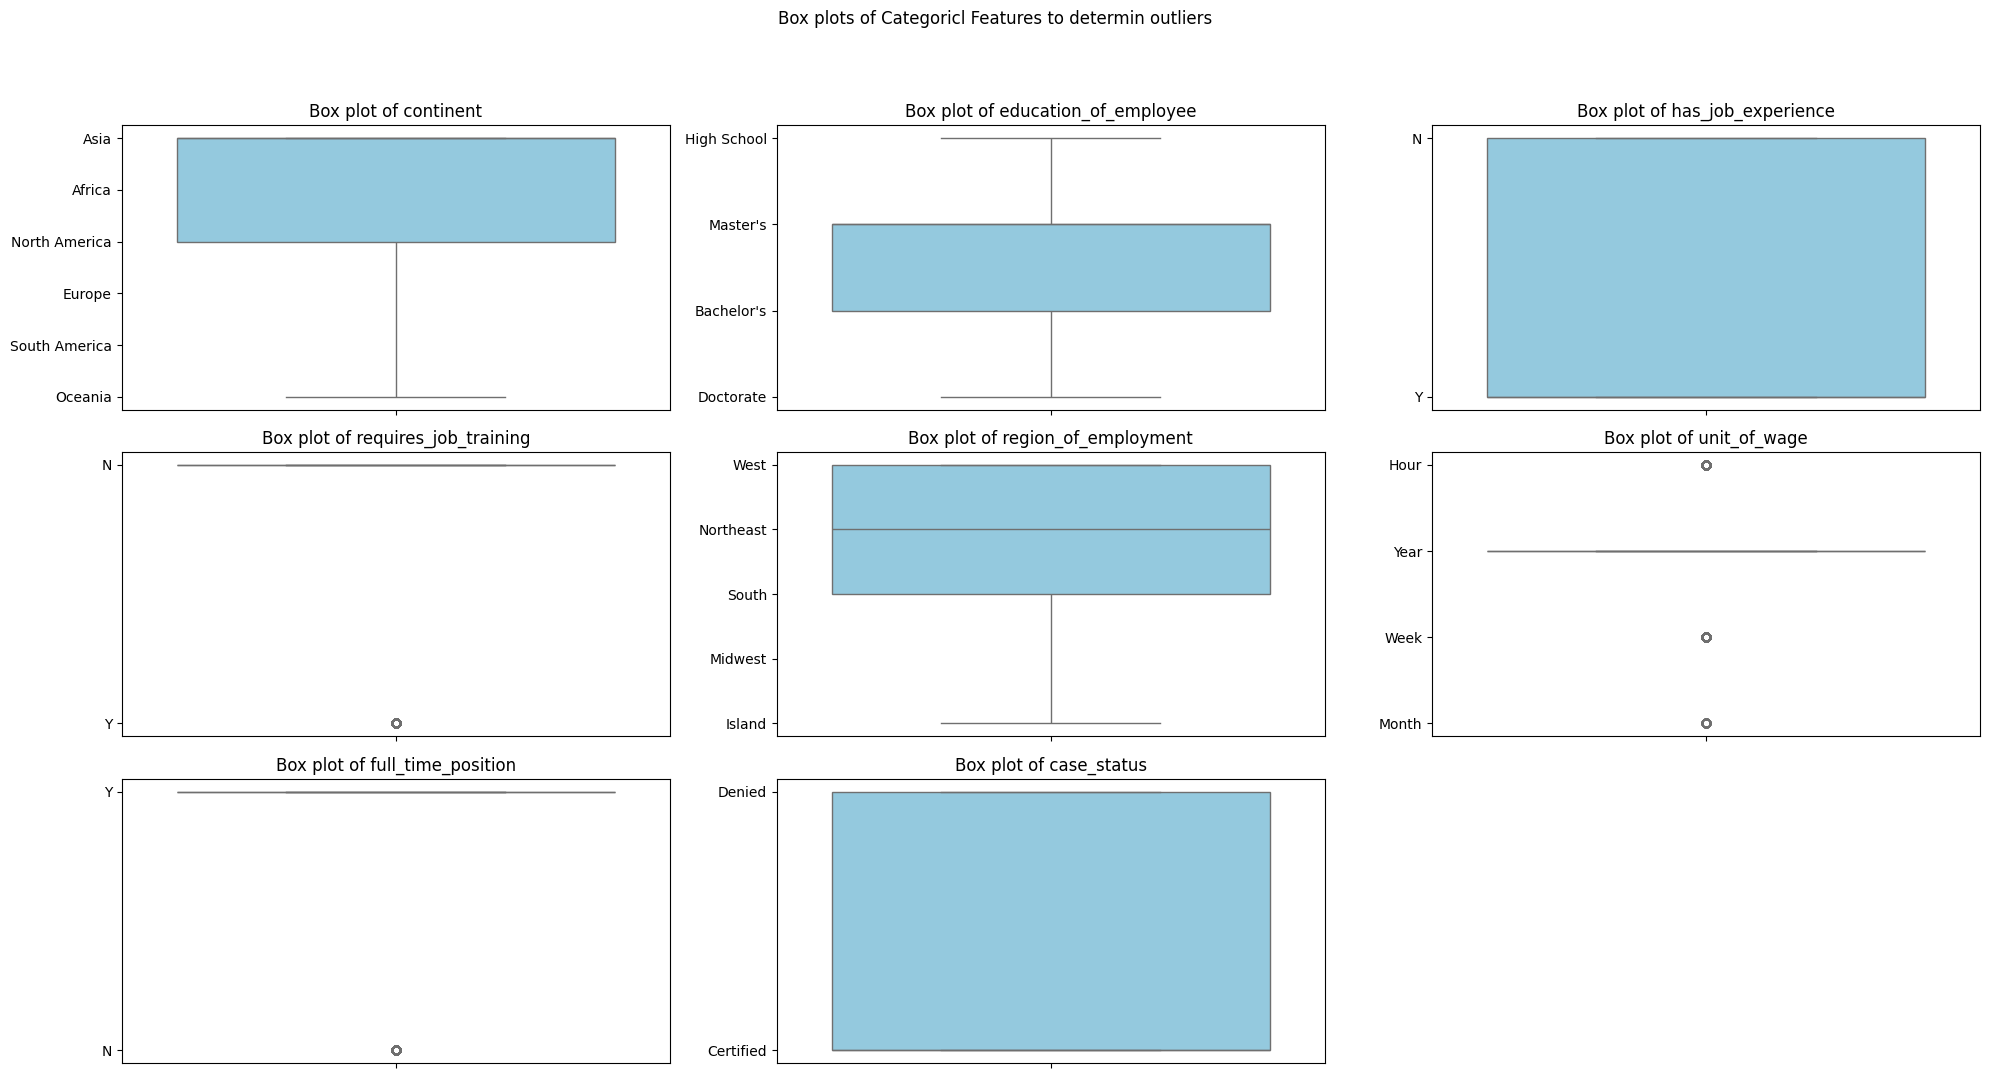

In [43]:
plt.figure(figsize=(20, 15))
plt.suptitle("Box plots of Categoricl Features to determin outliers")

for i, col in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)

    sns.boxplot(y= df[col], color= 'skyblue')
    plt.title(f"Box plot of {col}")
    plt.ylabel('')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()